# 2019 Chapel Hill Expert Survey
## Missing values analysis

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from urllib.request import urlretrieve
from pathlib import Path
from itertools import cycle
from typing import List, Optional
from sklearn.mixture import GaussianMixture

#### Data loading

In [2]:
# Code for data loading
data_url: str = "https://www.chesdata.eu/s/CHES2019V3.dta"
data_dir = Path("../data")
data_dir.mkdir(exist_ok=True)
data_path = data_dir / "CHES2019V3.dta"
ches_2019_data = pd.read_stata(data_path)

## Data distributipn and missing values

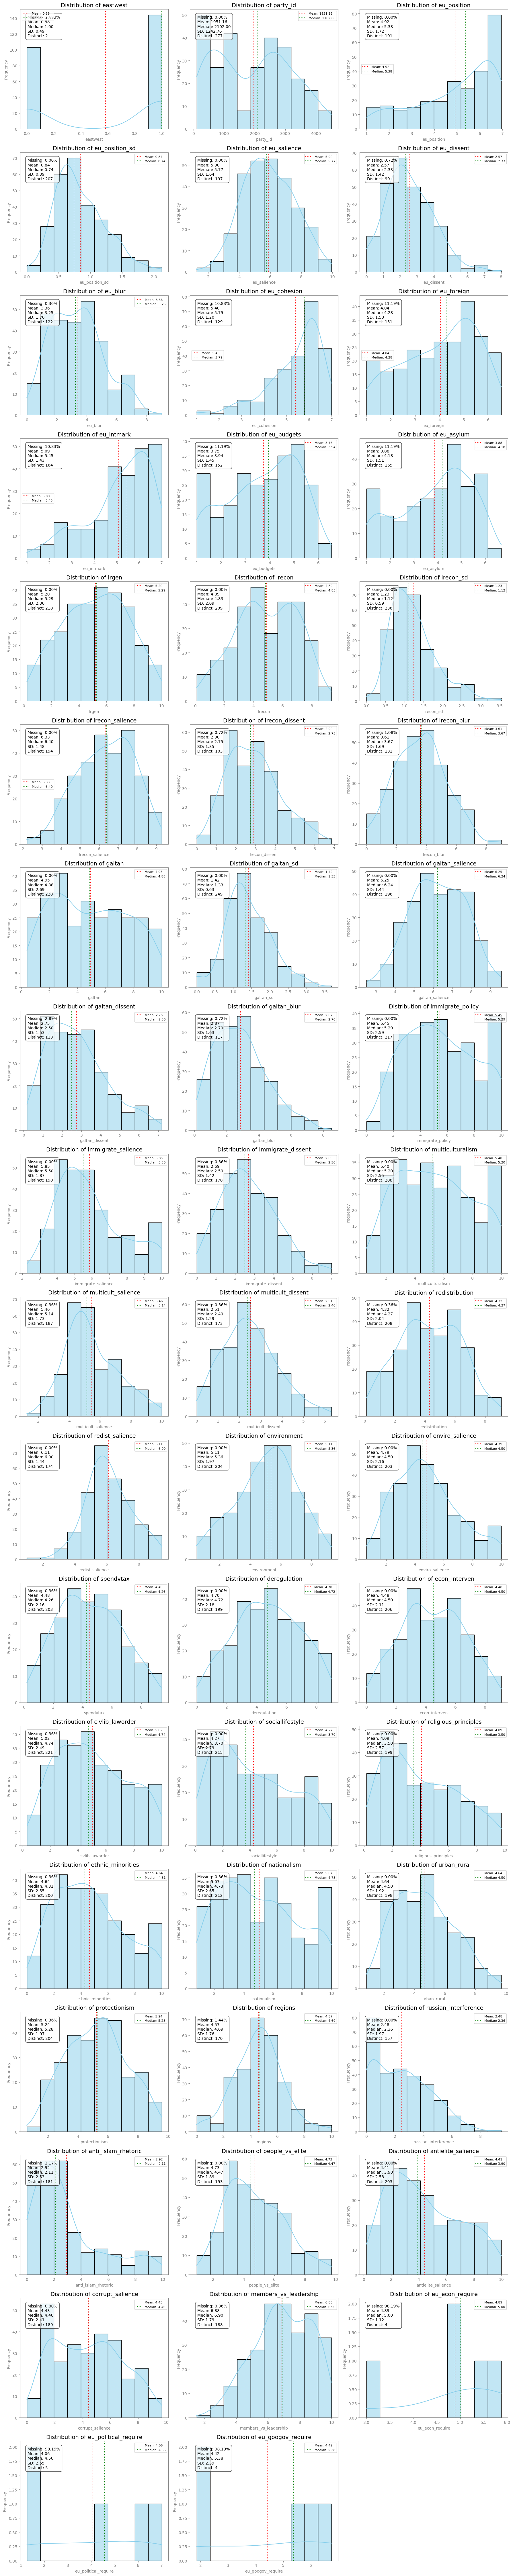

In [3]:
# Code for plotting histograms of numeric columns
numeric_cols = ches_2019_data.select_dtypes(include=np.number).columns.tolist()

if not numeric_cols:
    print("No numeric columns found in the DataFrame to plot histograms.")
else:

    num_plots = len(numeric_cols)
    cols_per_row = 3 
    rows = (num_plots + cols_per_row - 1) // cols_per_row

    fig, axes = plt.subplots(rows, cols_per_row, figsize=(6 * cols_per_row, 5 * rows))
    axes = axes.flatten() 

    total_rows = len(ches_2019_data)

    for i, col in enumerate(numeric_cols):
        ax = axes[i]
        data_series = ches_2019_data[col].dropna() 


        missing_count = ches_2019_data[col].isnull().sum()
        missing_percentage = (missing_count / total_rows) * 100 if total_rows > 0 else 0

        mean_val = data_series.mean()
        median_val = data_series.median()
        std_val = data_series.std()
        distinct_count = data_series.nunique()


        sns.histplot(data_series, kde=True, ax=ax, color='skyblue', bins=10) 

       
        ax.axvline(mean_val, color='red', linestyle=':', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
        ax.axvline(median_val, color='green', linestyle=':', linewidth=1.5, label=f'Median: {median_val:.2f}')
        ax.legend(fontsize=8) 

       
        stats_text = (f"Missing: {missing_percentage:.2f}%\n"
                      f"Mean: {mean_val:.2f}\n"
                      f"Median: {median_val:.2f}\n"
                      f"SD: {std_val:.2f}\n"
                      f"Distinct: {distinct_count}")

     
        ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, fontsize=10,
                verticalalignment='top', horizontalalignment='left', 
                bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.7))

        ax.set_title(f'Distribution of {col}', fontsize=14)
        ax.set_xlabel(col, fontsize=10)
        ax.set_ylabel('Frequency', fontsize=10)

      
        ax.grid(False)

       
        for spine in ax.spines.values():
            spine.set_edgecolor('grey')
        ax.tick_params(axis='x', colors='grey') 
        ax.tick_params(axis='y', colors='grey') 
        ax.xaxis.label.set_color('grey') 
        ax.yaxis.label.set_color('grey') 


    
    for j in range(num_plots, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()